# House Prices 

## Librerias y Configuraciones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

class Config():
    INPUT_DIR="./Housing Dreams/"
    TRAIN_FILE=INPUT_DIR+"house_train_raw.csv"
    TEST_FILE=INPUT_DIR+"houses_test_raw.csv"
    TARGET="SalePrice"
cf=Config()

## Explorando el DataFame de train

In [2]:
df_train = pd.read_csv(cf.TRAIN_FILE,index_col="Id")
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.shape

(1460, 80)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
dtypes=df_train.drop(cf.TARGET,axis=1).dtypes
objects_col=dtypes[dtypes=="object"].index
numeric_cols=dtypes[(dtypes=="float64")|(dtypes=="int64")].index

In [6]:
print("Variables Categoricas:", len(objects_col))
print("Variables Numericas:", len(numeric_cols))


Variables Categoricas: 43
Variables Numericas: 36


### Calculando el numero de valores unicos

In [7]:
pd.Series([df_train[col].nunique() for col in objects_col],index=objects_col).sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
BsmtFinType2      6
Heating           6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
GarageType        6
Foundation        6
Electrical        5
FireplaceQu       5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
ExterCond         5
BldgType          5
BsmtExposure      4
MiscFeature       4
Fence             4
LotShape          4
LandContour       4
BsmtCond          4
KitchenQual       4
MasVnrType        4
ExterQual         4
BsmtQual          4
LandSlope         3
GarageFinish      3
PavedDrive        3
PoolQC            3
Utilities         2
CentralAir        2
Street            2
Alley             2
dtype: int64

In [8]:
pd.Series([df_train[col].nunique() for col in numeric_cols],index=numeric_cols).sort_values(ascending=True)

BsmtHalfBath        3
HalfBath            3
Fireplaces          4
KitchenAbvGr        4
FullBath            4
BsmtFullBath        4
GarageCars          5
YrSold              5
PoolArea            8
BedroomAbvGr        8
OverallCond         9
OverallQual        10
TotRmsAbvGrd       12
MoSold             12
MSSubClass         15
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
YearRemodAdd       61
ScreenPorch        76
GarageYrBlt        97
LotFrontage       110
YearBuilt         112
EnclosedPorch     120
BsmtFinSF2        144
OpenPorchSF       202
WoodDeckSF        274
MasVnrArea        327
2ndFlrSF          417
GarageArea        441
BsmtFinSF1        637
TotalBsmtSF       721
1stFlrSF          753
BsmtUnfSF         780
GrLivArea         861
LotArea          1073
dtype: int64

### Detectando Valores Faltantes

In [9]:
X=df_train.drop(cf.TARGET,axis=1)
y=df_train[cf.TARGET]

LotFrontage      3.2375
Alley           17.1125
MasVnrType       0.1000
MasVnrArea       0.1000
BsmtQual         0.4625
BsmtCond         0.4625
BsmtExposure     0.4750
BsmtFinType1     0.4625
BsmtFinType2     0.4750
Electrical       0.0125
FireplaceQu      8.6250
GarageType       1.0125
GarageYrBlt      1.0125
GarageFinish     1.0125
GarageQual       1.0125
GarageCond       1.0125
PoolQC          18.1625
Fence           14.7375
MiscFeature     17.5750
dtype: float64

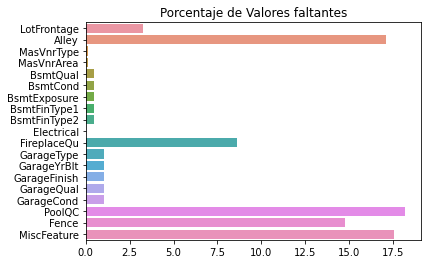

In [10]:
missings=df_train.isna().sum()
missings=missings[missings>0]/missings.shape[0]
sns.barplot(x=missings.values,y=missings.index).set_title("Porcentaje de Valores faltantes");
missings

### Correlacion entre Features

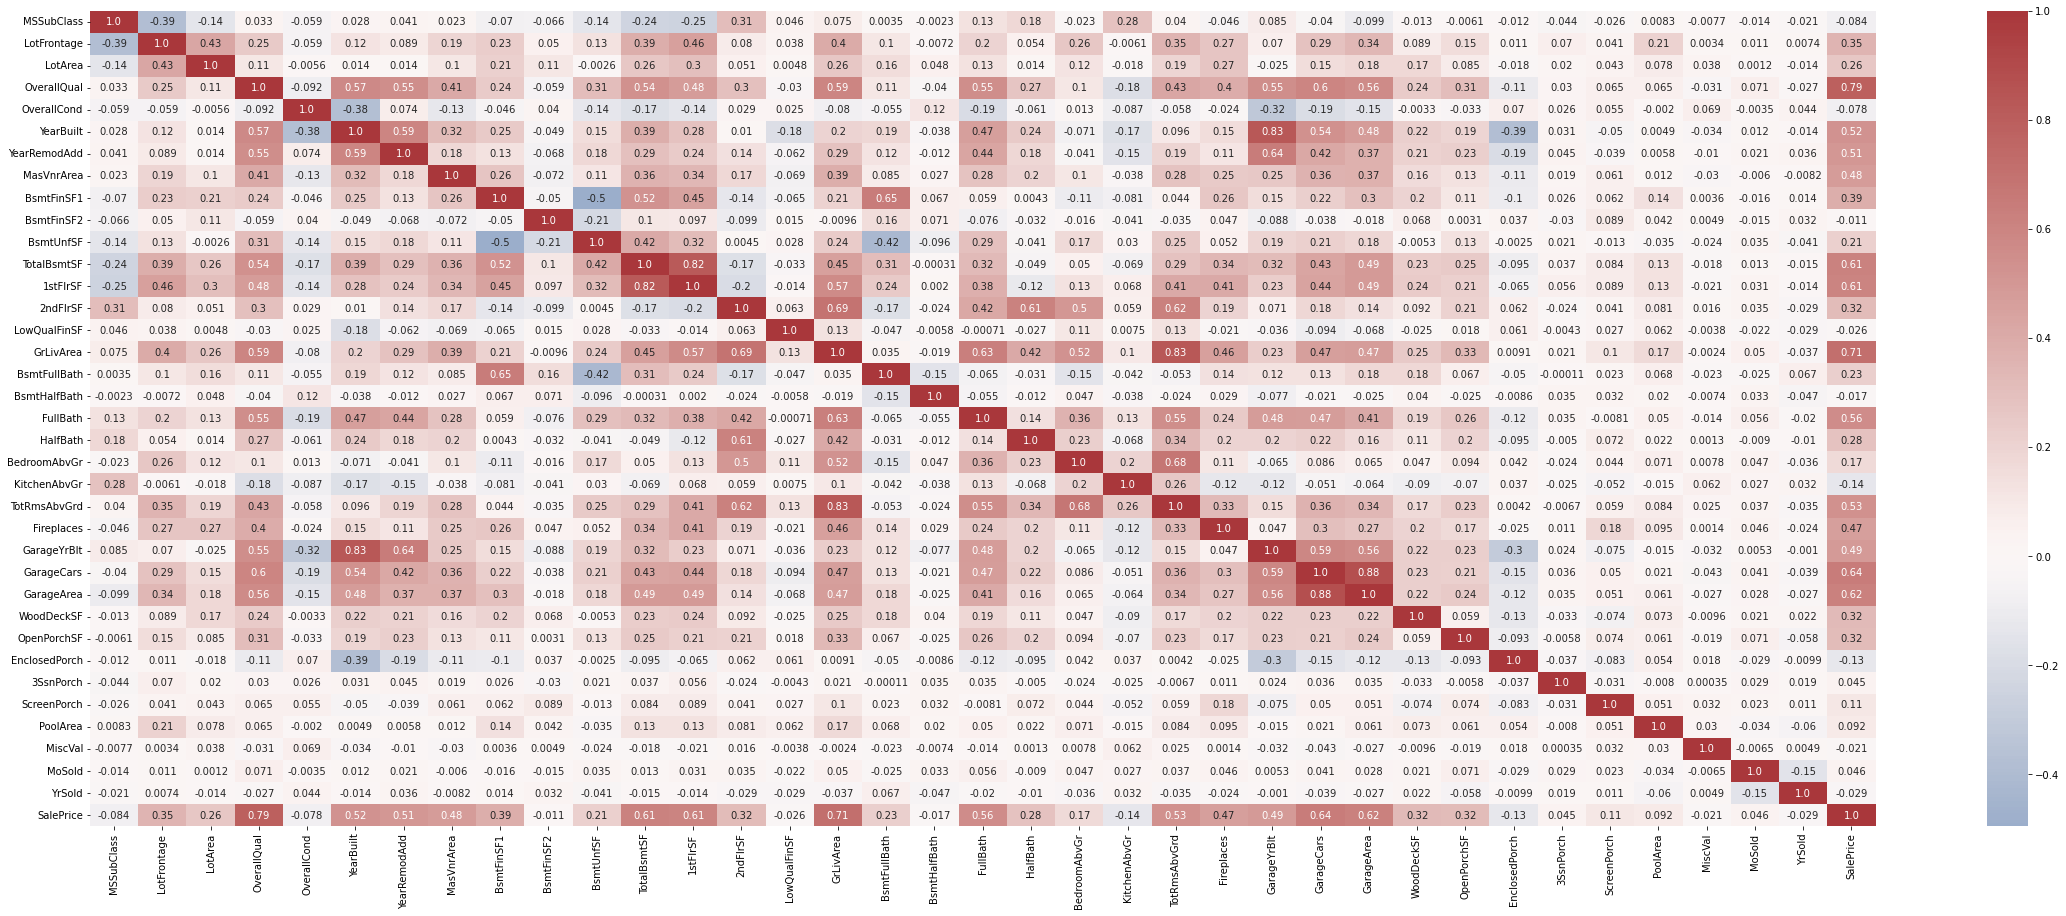

In [11]:
corr=df_train.corr()
plt.figure(figsize=(40,15))
sns.heatmap(corr,annot=True,cmap="vlag",fmt=".2",center=0);

### Correlacion de los Features con el Target

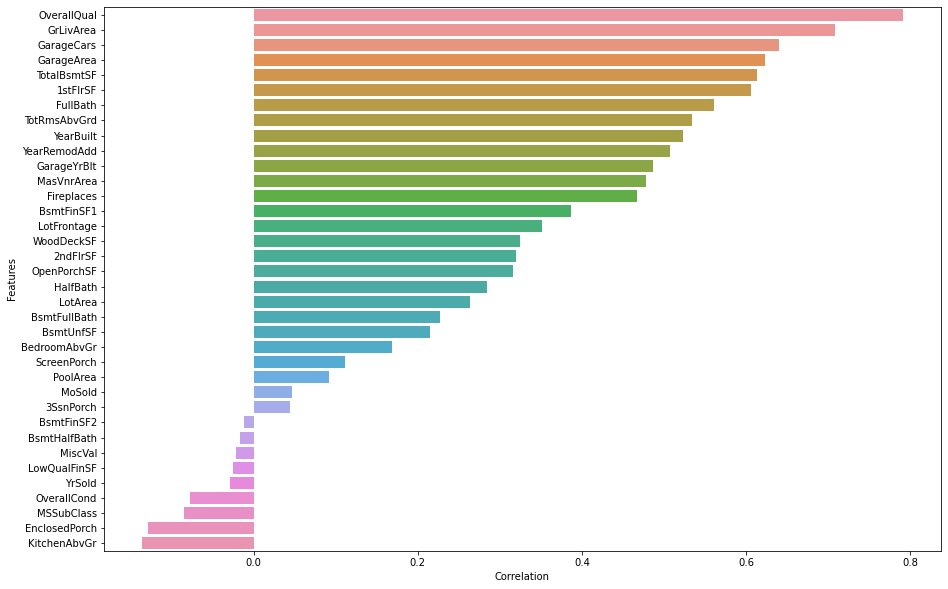

In [12]:
corr = X.corrwith(y).sort_values(ascending=False)
corr = pd.DataFrame({"Features":corr.index,"Correlation":corr.values})
plt.figure(figsize=(15,10))
sns.barplot(x=corr["Correlation"],y=corr["Features"]);



In [13]:
# features=corr.loc[corr["Correlation"].abs()>=0.5,"Features"]
# features=list(features)
# features

## Creando un Pipeline

In [14]:
categorical_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("OneHot",OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), numeric_cols),
        ("cat", categorical_transformer, objects_col),
    ]
)

X_clean=preprocessor.fit_transform(X)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_clean, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

regresor=GradientBoostingRegressor()
regresor.fit(X_train,y_train);

In [28]:
msle=mean_squared_log_error(y_val, regresor.predict(X_val), squared=False) # MSLE
print("MSLE",np.round(msle,4))

MSLE 0.1322
